#Name: UFUK CEM BIRBIRI

## Assigments 3.1

This first part of the assignment requires to implement yourself basic cross-validation strategies.

**Exercise 1.** Define a 10-fold classification strategy to test the accuracy of a Linear Discriminant Analysis (LDA) classifier for the data created as follows:

In [272]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, \
                           random_state=0, n_clusters_per_class=1, weights = [0.5])


Plot the data points:

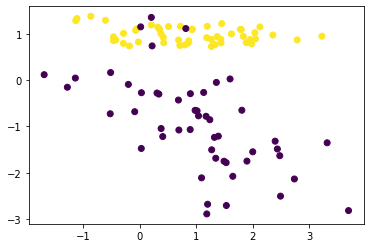

In [273]:
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [274]:
#Control the shapes
X.shape, y.shape

((100, 2), (100,))

In [275]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


#Define a list that is used to store the accuracy results of 10-fold cross-validation
test_accuracies=[]
train_accuracies=[]

#Define some lists for Exercise-2
roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

#Run 10-fold cross-validation
for i in range(10):

  begin = int(i*(len(X)/10))
  end = int((i+1)*(len(X)/10))
  #First, define the testing data
  X_test = X[  begin : end]
  y_test = y[  begin : end]
  
  #Define the training data
  X_train = X
  X_train = np.delete(X_train,  np.s_[begin : end]  , 0)
  y_train = y
  y_train = np.delete(y_train,  np.s_[begin : end]  , 0)

  #Run the model
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train, y_train)
  #y_pred = lda.predict(X_test)
  #accuracies.append(  accuracy_score(y_test, y_pred) )
  test_accuracies.append(  lda.score(X_test, y_test) )
  train_accuracies.append( lda.score(X_train, y_train))

  '''
  #######################################
  BELOW PART IS FOR EXERCISE-2'''
  #Make prediction using predict_proba
  probas_ = lda.predict_proba(X_test)
  # Compute ROC curve and area under the curve
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  roc_sample.append(np.interp(mean_fpr, fpr, tpr))
  # We impose the ROC curve to start from 0
  roc_sample[-1][0] = 0.0
  # Compute the area under the curve
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  '''ABOVE PART IS FOR EXERCISE-2
  #######################################'''



print("test_accuracies = ",test_accuracies)
print("Avg. test accuracy is = ",np.mean(test_accuracies))
print('SD test accuracy', np.std(test_accuracies))
print()

print("train_accuracies = ",train_accuracies)
print("Avg. train accuracy is = ",np.mean(train_accuracies))
print('SD train accuracy', np.std(train_accuracies))




test_accuracies =  [0.9, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Avg. test accuracy is =  0.9400000000000001
SD test accuracy 0.07999999999999999

train_accuracies =  [0.9444444444444444, 0.9333333333333333, 0.9333333333333333, 0.9444444444444444, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556]
Avg. train accuracy is =  0.9400000000000001
SD train accuracy 0.008888888888888896


__Exercise 2.__ Use the previous 10-fold cross-validation to plot and compute the average area under the curve of the LDA classifier. You can use the built in method *predict_proba(X)*

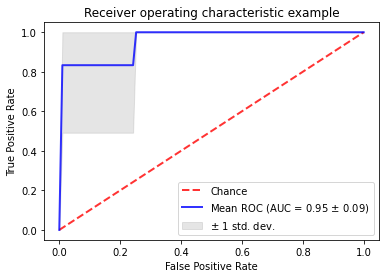

In [276]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Summarizing the cross-validation results

# Adding diagonal line of random classification 
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

# Computing mean and std for the curves
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)

# We impose the end point of the average ROC to be equal to 1
mean_tpr[-1] = 1.0

# Computing the AUC of the average curves
mean_auc = auc(mean_fpr, mean_tpr)
# Computing the std of the AUCs 
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)


# Nice plot of curve with std
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Exercise 3.** Define the appropriate cross-validation strategy and measurement of the area under the curve for the data:

In [277]:
X, y = make_classification(n_samples = 200, n_features=5, n_redundant=0, n_informative=3, \
                           random_state=0, n_clusters_per_class=1, weights = [0.9])

Plot the data:

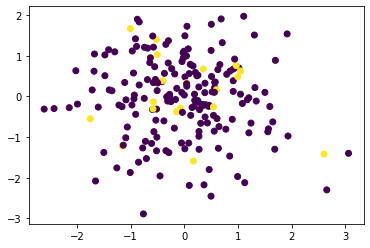

In [278]:
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [279]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)

print("*** Training ***")
print("Percentage of elements belongs to class 0: ", np.sum(y_train==0),"%")
print("Percentage of elements belongs to class 1: ", np.sum(y_train==1),"%")

print("*** Testing ***")
print("Percentage of elements belongs to class 0: ", np.sum(y_test==0),"%")
print("Percentage of elements belongs to class 1: ", np.sum(y_test==1),"%")

*** Training ***
Percentage of elements belongs to class 0:  86 %
Percentage of elements belongs to class 1:  14 %
*** Testing ***
Percentage of elements belongs to class 0:  95 %
Percentage of elements belongs to class 1:  5 %


As we can see above, the training and testing datasets are not balanced. The number of items in class 1 are under-represented because their amount is so less compared to number of items in class 1. When the dataset is unbalanced, we use stratified k-fold cross validation where we keep the proportion of the classes as contants. We don't keep the proportions constant, we can have problems in train-test split:

- What if all the class 1 is used in training and does not show up in testing?
- What if all the class 1 is used in testing and does not show up in training?(In the last case, all of the predictions of class 1 will be zero since the model will not be able to learn anything from class 1 becasue it is not in training).

So, let's use stratified k-fold. Again we chose k = 10.



In [280]:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import recall_score

#Define skf
skf = StratifiedKFold(n_splits=10)

#Define some lists to save the results in every fold:
test_acc=[]
train_acc=[]
precisions=[]
recalls=[]
f1_scores=[]

#Apply cross_validation
for train, test in skf.split(X, y):
    
    #To print the proportipon of elements in classes to prove that proportion is protected.
    #I put them in a comment to have a clear output.
    '''
    print("*** Training ***")
    print("Elements of class 0: " + str(np.sum(y[train]==0)/len(y[train])))
    print("Elements of class 1: " + str(np.sum(y[train]==1)/len(y[train])))

    print("*** Testing ***")
    print("Elements of class 0: " + str(np.sum(y[test]==0)/len(y[test])))
    print("Elements of class 1: " + str(np.sum(y[test]==1)/len(y[test])))
    print()
    '''
    #Run the model
    lda = lda.fit(X[train], y[train])

    #Calculate accuracy
    test_acc.append( lda.score(X[test], y[test]) )
    train_acc.append( lda.score(X[train], y[train]) )

    #Calculate Presicion and Recall
    P = precision_score(lda.predict(X_test), y_test)
    R = recall_score(lda.predict(X_test), y_test)
    precisions.append( P )
    recalls.append( R  )
    
    #Calculate F1 score
    f1_scores.append( 2*P*R/(P+R) )


print("Avg. test accuracy is = ",np.mean(test_acc))
print('SD test accuracy', np.std(test_acc))
print()
print("Avg. train accuracy is = ",np.mean(train_acc))
print('SD train accuracy', np.std(train_acc))
print("----------------------------")
print("Avg. Precision = ",np.mean(precisions))
print("Avg. Recall = ",np.mean(recalls))
print("Avg. F1 Scores = ",np.mean(f1_scores))
print("----------------------------")

Avg. test accuracy is =  0.97
SD test accuracy 0.024494897427831803

Avg. train accuracy is =  0.97
SD train accuracy 0.0027216552697590774
----------------------------
Avg. Precision =  0.8
Avg. Recall =  1.0
Avg. F1 Scores =  0.888888888888889
----------------------------




Accuracy is not a good evaluation metric since the dataset is unbalanced. What if the classifier always predict positive class and does not care about negative class?

In this case, the better metrics are precision, recall and F1 Score when we have unbalanced data problem.

Above, we calculated the recall, precision and f1 score in every fold.

Also we cannot use the ROC AUC in unbalanced datasets because it does not give us trustable result like accuracy:

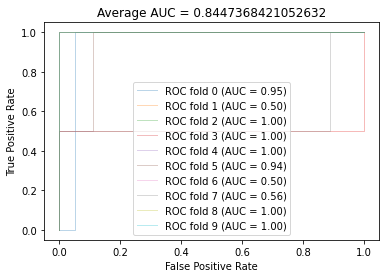

In [281]:
cv = StratifiedKFold(n_splits=10)
roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    probas_ = lda.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    # We impose the ROC curve to start from 0
    roc_sample[-1][0] = 0.0
    # Compute the area under the curve
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plotting the ROC curve
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    i += 1

plt.legend()
plt.title("Average AUC = " + str(np.mean(aucs)))
plt.show()


We can also plot ROC AUC with precision and recall:

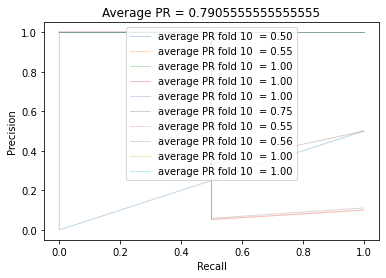

In [282]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

avg_pr = []
mean_R = np.linspace(0, 1, 100)

cv = StratifiedKFold(n_splits=10)
#
for train, test in cv.split(X, y):
    probas_ = lda.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    P, R, thresholds = precision_recall_curve(y[test], probas_[:, 1])

    average_precision = average_precision_score(y[test], probas_[:, 1])
    avg_pr.append(average_precision)
    # Plotting the ROC curve
    plt.plot(R, P, lw=1, alpha=0.3,
             label='average PR fold %d  = %0.2f' % (i, average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')


plt.legend()
plt.title("Average PR = " + str(np.mean(avg_pr)))
plt.show()



## Assigments 3.2

__Exercise 1.__ During lesson we discussed the problem of _selection bias_ in cross-validation. 
This problem is nicely investigated in the paper *On the Dangers of Cross-Validation. An Experimental Evaluation*, accessible here:

http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf


Read  
- Section 1 (Introduction), 
- Section 4 (Experiments on Synthetic Data), 
- Section 7 (Discussion)

And write a short summary (~half a page) about these three sections (results and take home message).



#A short summary of the Sections 1-4-7 in the paper *On the Dangers of Cross-Validation* 


Our goal is to get a good performance on the unseen data which has the same distribution as training data and reduce the generalization error. Cross-validation(CV) is a technique to allows you to use your all dataset for testing by repeated resampling and avoiding overfitting. You divide your dataset as training and testing, and each time you change your test data with new samples.

This paper is an experimental study of the behavior of cross-validation.

**Impact of data size and dimensionality**
In general, when you increase the model complexity, you increase the chance of overfitting and that is also true for cross-validation space. If our dataset is small and the number of features is high, we could suffer from "Curse of Dimensionality".

**Cross-validation for feature selection**
CV can also be used for feature selection using the greddy wrapper method. In this method, we make a iteratively search on training data by evaluating all possible combinations of features and selecting the ones that minimize the Leave-One-Out-CV(LOOCV) error. 

LOOCV is a method where just only one data point in the dataset is used as testing data, and the rest are used as training data. However, a small amount of test data generally result in a higher variance in prediction. 

In the paper, they chose a subset of features that reduce the LOOCV error more. And they did this by using different dataset parts each time.

**Impact of number of features selected**
 Let's assume we have a large amount of dataset. After we chose a small number of best features, increasing the number of selected features in the model makes a little difference.

**Impact of number of features to select from**

To avoid overfitting, the general approach for feature selection is to choose a small number of features in the model. In the paper, they prove that choosing more features causes overfitting in a small sample size(n=100).

**Take Home Message**

1. When we increase the # of algorithms, LOOCV becomes useless for generalization because a large number of algorithms cause overfitting in CV. Also, this effect gets worse when we decrease the # of samples and increase the # of dimensions.

2. Having more training data is better generally for model performance. In addition, a small amount of test data cause a higher variance in prediction.

3. If we have a small dataset, then in the feature selection phase we should limit the # of features first. Then adding new features should be done with a lot of care.